# Task 2 : Sales Prediction Model

##  Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing

### About Data
This dataset contains information about advertising spending on TV, radio, and newspaper, along with corresponding sales figures.

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reading the data frame
df = pd.read_csv('advertising.csv')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.shape

(200, 4)

In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Calculating Skewness

In [14]:
for i in df.columns:
    print(i)
    print('Skewness: ',df[i].skew())

TV
Skewness:  -0.06985336213274573
Radio
Skewness:  0.09417463149664404
Newspaper
Skewness:  0.8947204074986175
Sales
Skewness:  -0.07373923537186912


## Correlation

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Data Visualization

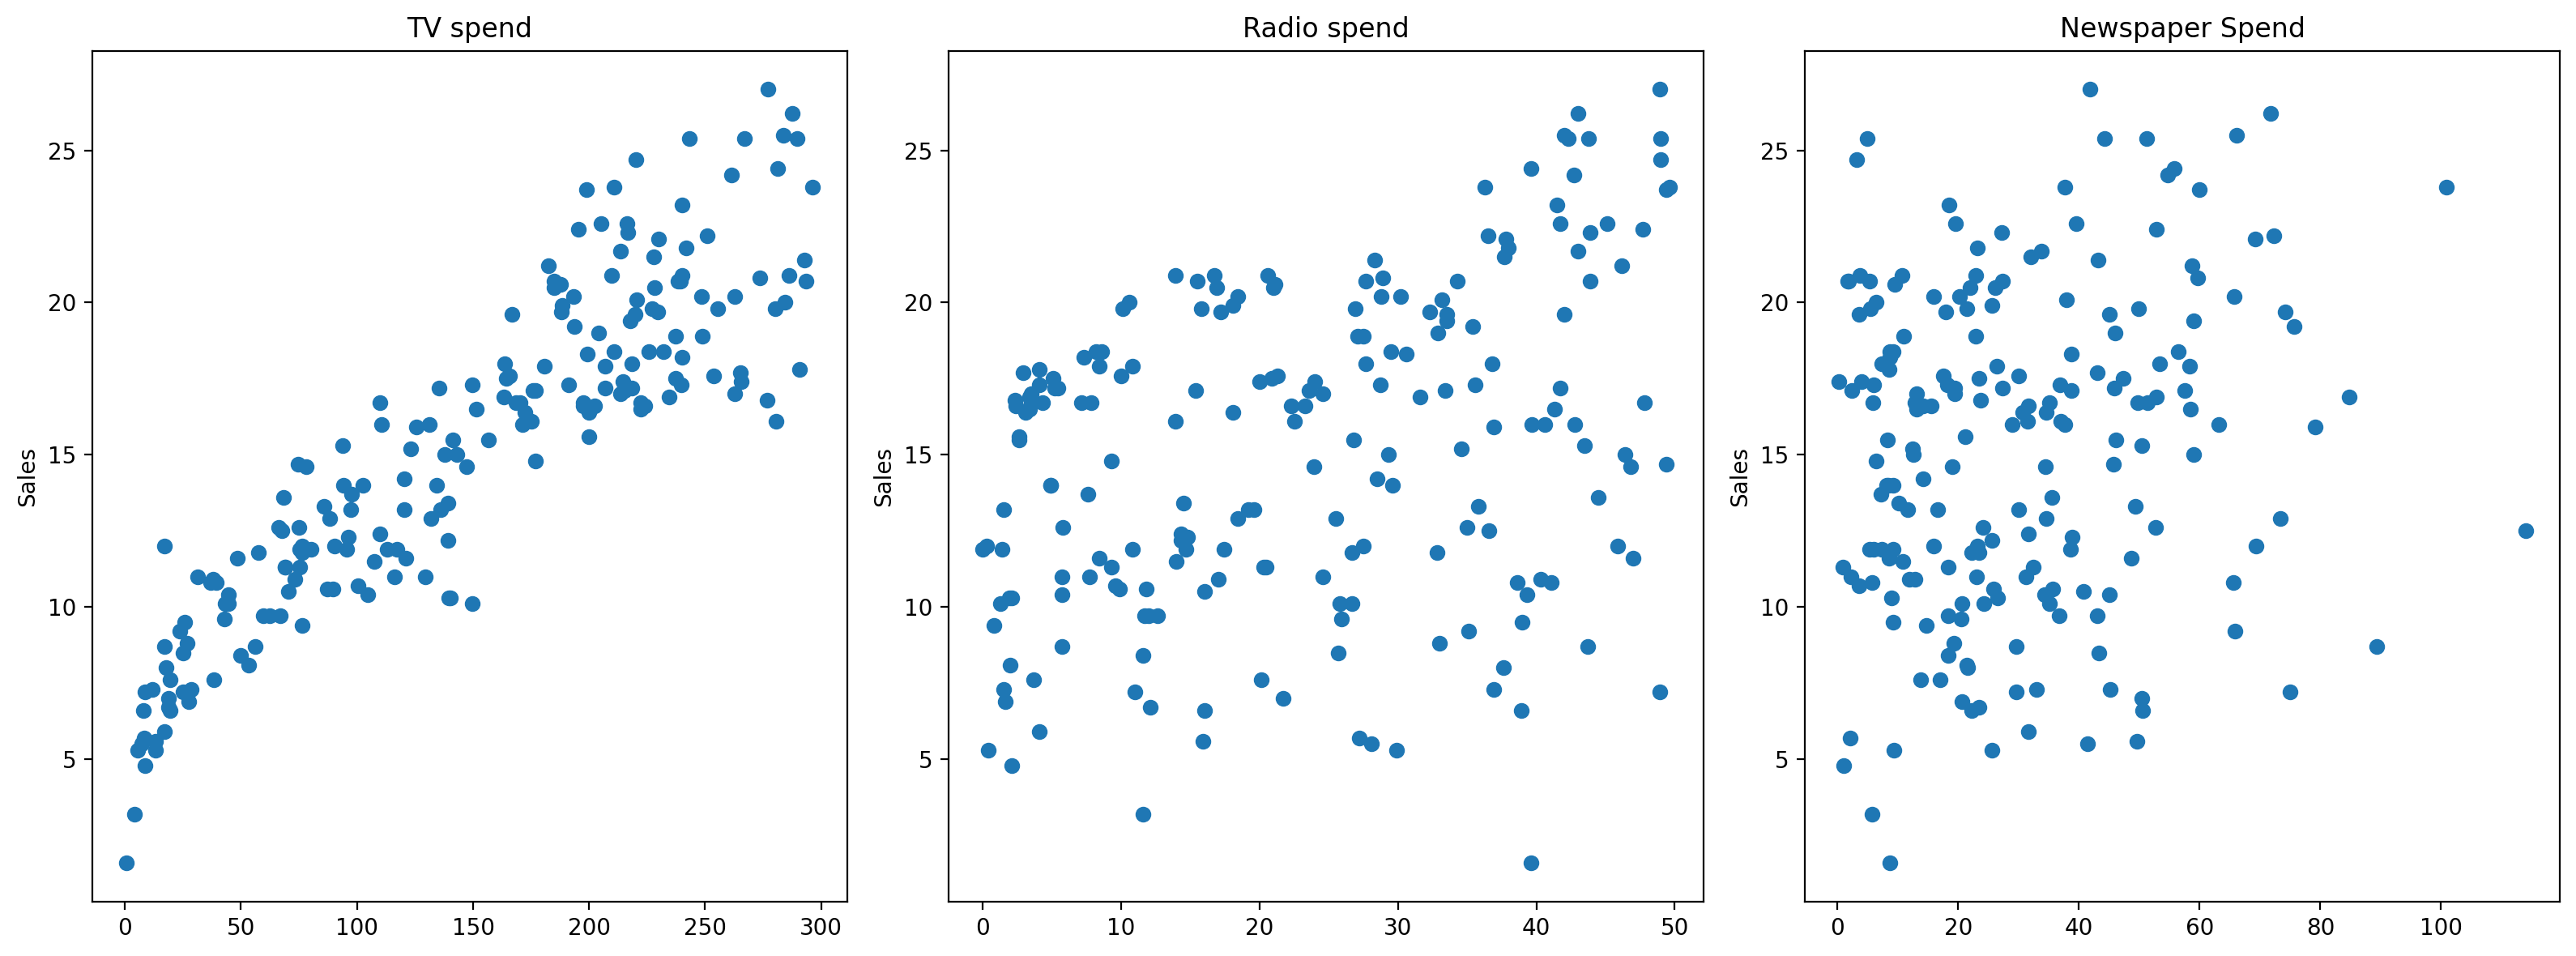

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=200)

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV spend')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio spend')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

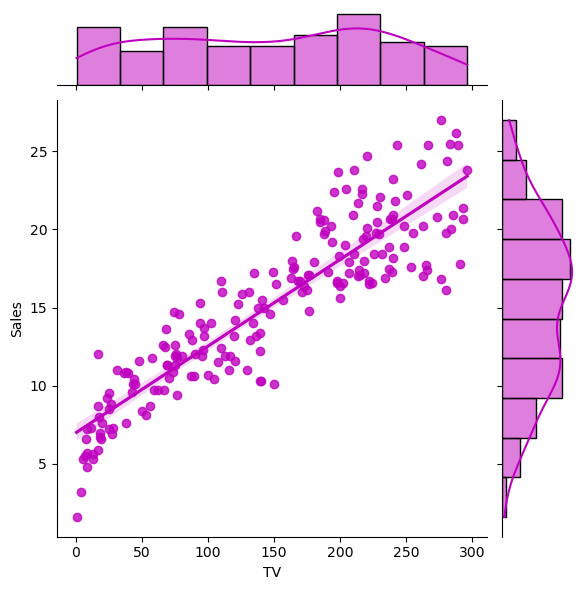

In [19]:
plt.figure(figsize=(6,3),dpi=200)
sns.jointplot(x='TV',y='Sales',data=df,kind='reg',color='m')
plt.show()

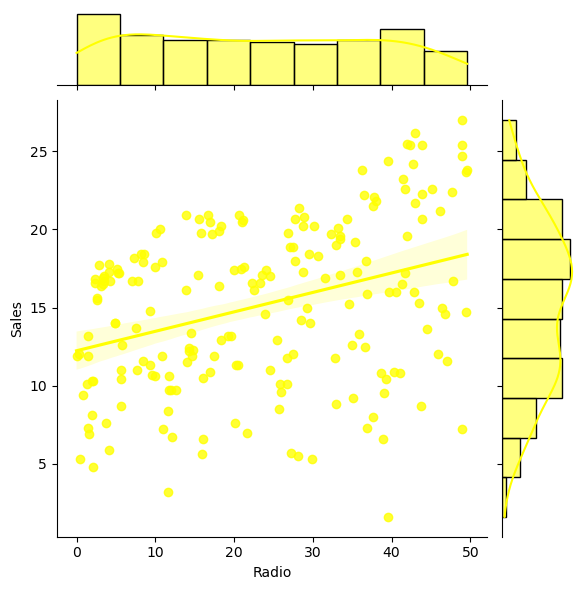

In [20]:
sns.jointplot(x='Radio',y='Sales',data=df,kind='reg',color='yellow')
plt.show()

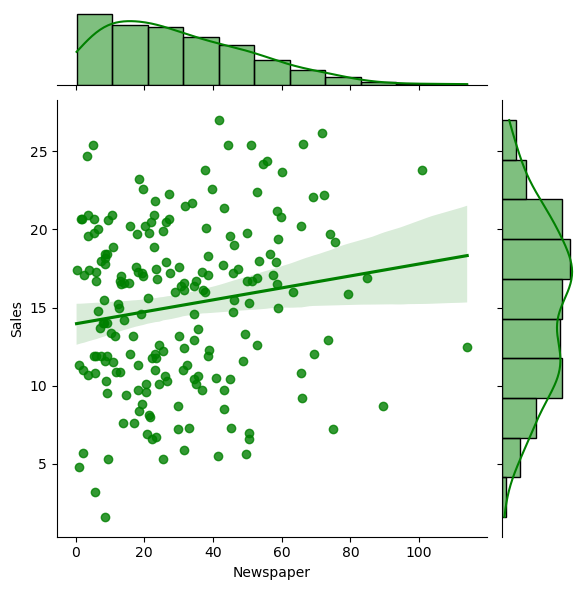

In [21]:
sns.jointplot(x='Newspaper',y='Sales',data =df,kind='reg',color='green')
plt.show()

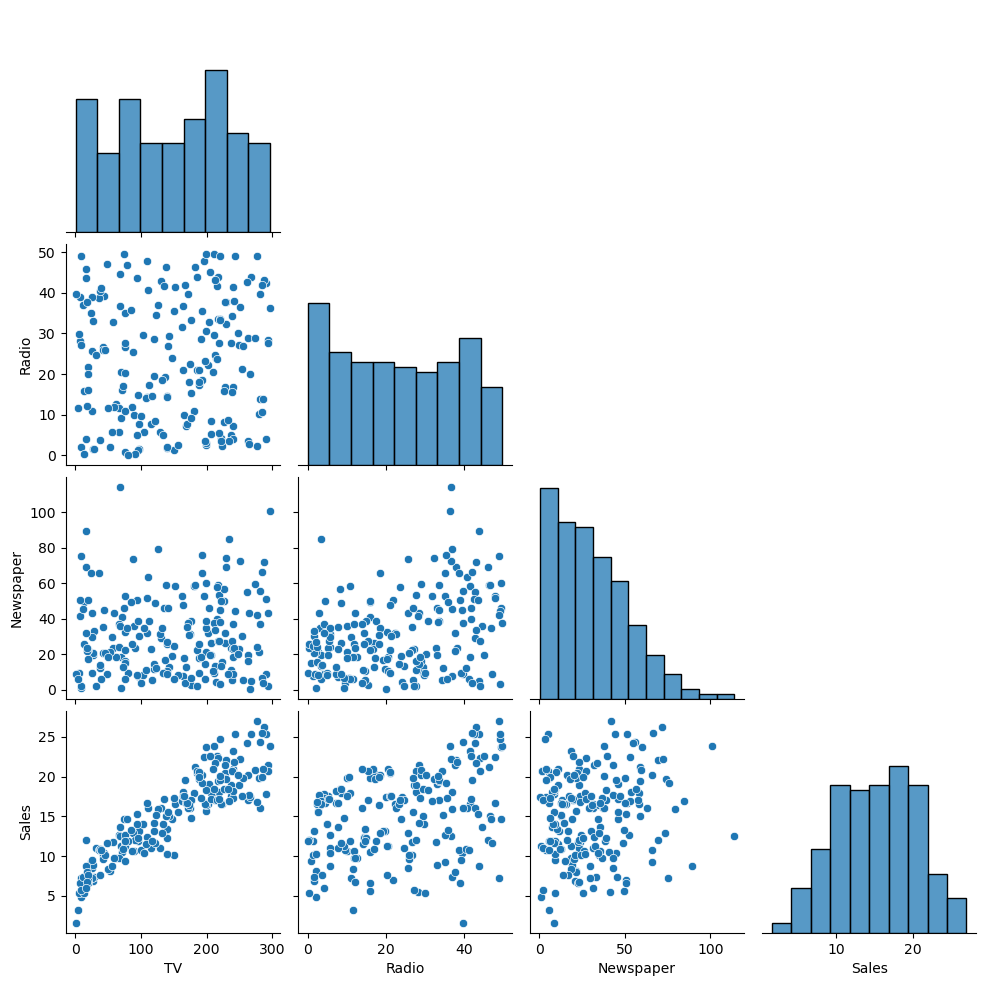

In [22]:
sns.pairplot(df,corner=True)
plt.show()

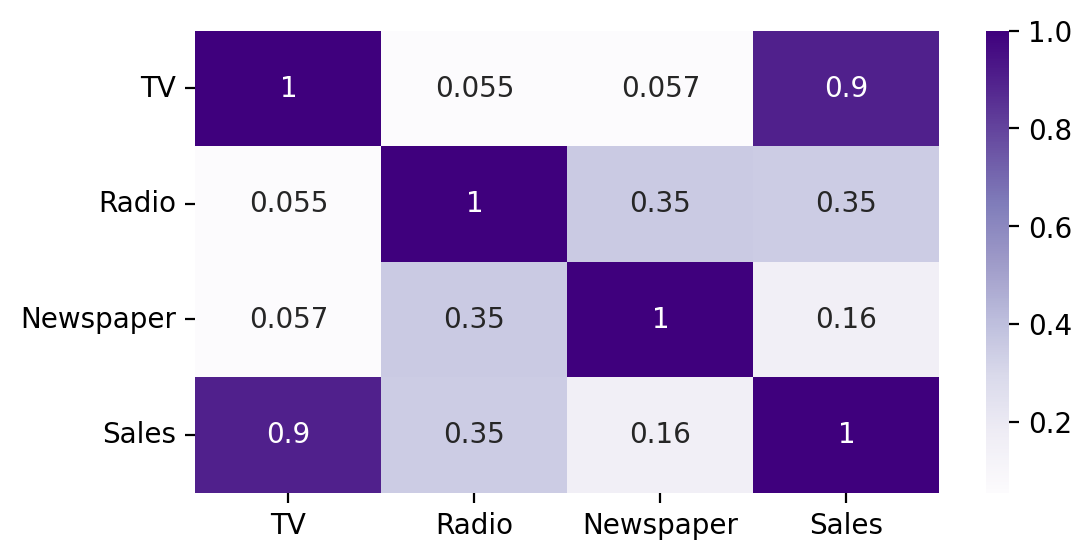

In [23]:
plt.figure(figsize=(6,3),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='Purples')
plt.show()

## Spliting the Data
Using Train_test_split

In [25]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Implementing the Model
Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
test_predictions = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
print('Mean Absolute Error =', mean_absolute_error(y_test,test_predictions))
print('Mean Squared Error = ',np.sqrt(mean_squared_error(y_test,test_predictions)))

Mean Absolute Error = 1.1594875061090588
Mean Squared Error =  1.5942471691143596


In [43]:
test_residuals = y_test - test_predictions

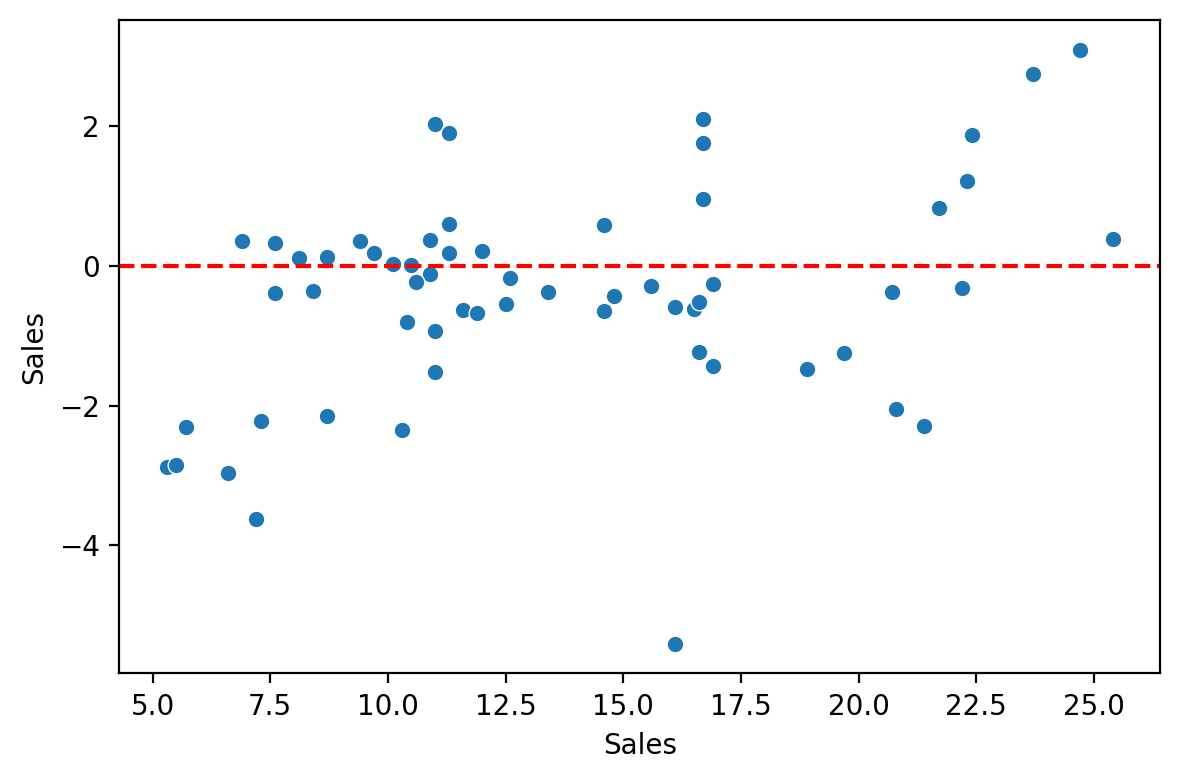

In [44]:
plt.figure(figsize=(6,4),dpi=200)
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')
plt.tight_layout()
plt.show()

In [45]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [46]:
final_model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [47]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Interpreting the coefficients:


* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.



* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.



* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.


In [50]:
y_hat = final_model.predict(X)

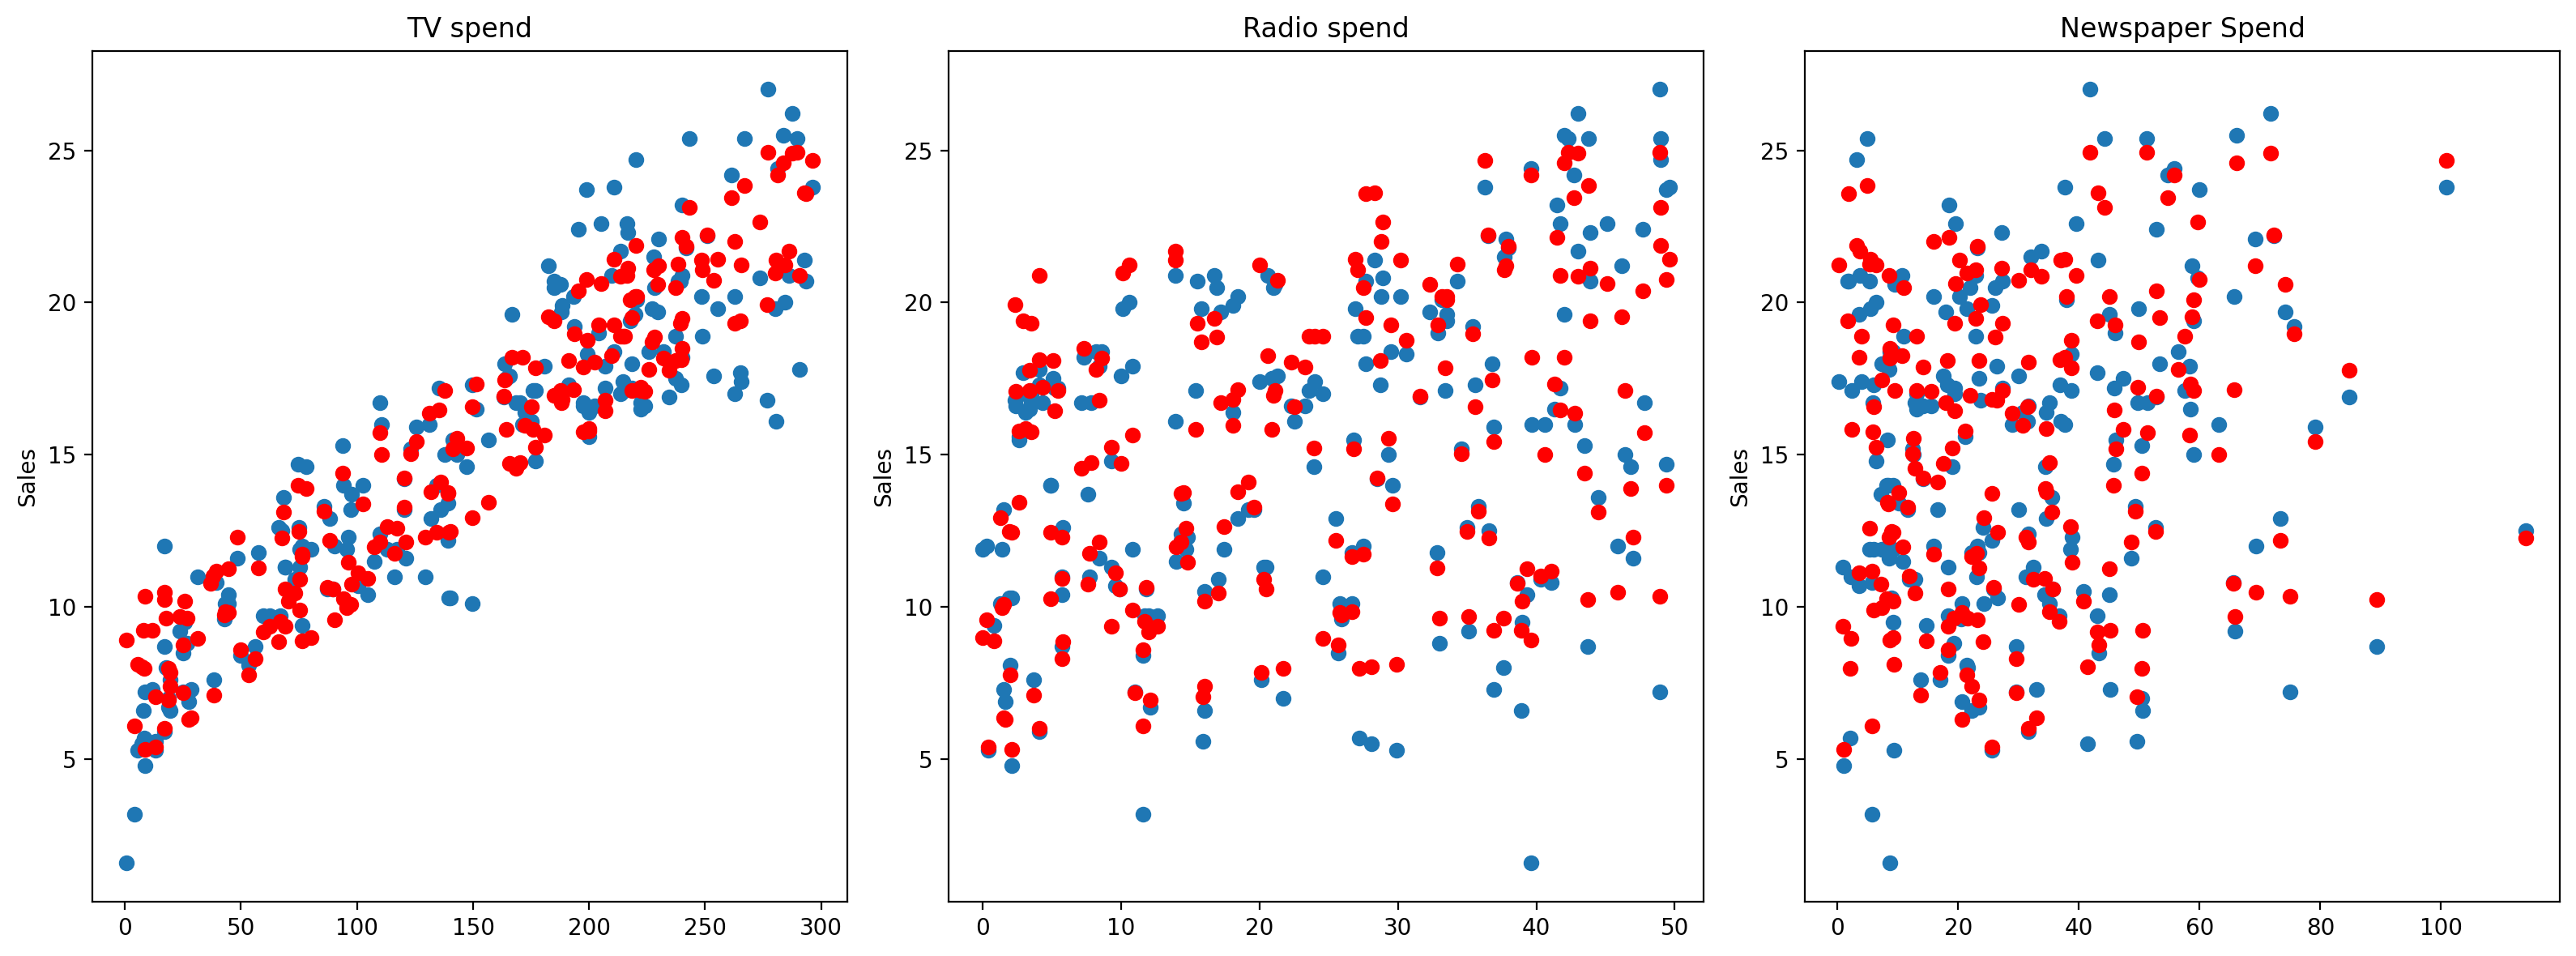

In [51]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=200)

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV spend')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio spend')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

### Prediction 

In [54]:
campaign = np.array([[149,22,12]])

In [55]:
predictions = final_model.predict(campaign)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
predictions

array([15.09560027])